# Abstract
The goal of this study is to develop a predictive model for accurately estimating the price of rental properties listed on a platform similar to Airbnb. It is a common challenge to predict rental prices due to the diverse factors influencing them. For this analysis, the log price is considered the dependent variable, influenced by various independent variables such as property type, room type, amenities, number of accommodations, and location. The initial step involves identifying key factors that significantly impact rental prices. Subsequently, a predictive model will be constructed, employing linear regression among other advanced machine learning methods, to analyze the dataset of rental listings. This model aims to not only predict rental prices with a higher degree of accuracy but also to offer insights into the factors that most significantly affect those prices. Through comprehensive data analysis, this study will explore the effectiveness of different predictive models in the context of rental price estimation, potentially revealing opportunities for further algorithmic improvements.

# Dataset Description
This dataset, a comprehensive compilation of rental listings, was meticulously curated to facilitate an in-depth analysis of factors affecting rental prices on a popular accommodation-sharing platform. It encompasses a broad spectrum of variables, including:

* ID: Unique identifier for each listing.
* Log Price: Natural logarithm of the rental price, serving as the dependent variable for predictive modeling.
* Property Type: Categorizes the listing into various types of properties (e.g., apartment, house).
* Room Type: Specifies the room category (e.g., Entire home/apt, Private room).
* Amenities: Lists the amenities provided with each listing.
* Accommodates: The maximum number of guests the property can accommodate.
* Bathrooms, Bedrooms, Beds: Quantifies the number of bathrooms, bedrooms, and beds available.
* City: The city in which the property is located.
* Location: Geographical coordinates (latitude and longitude) pinpointing the property's exact location.
* Number of Reviews: Total reviews received by the listing.
* Review Scores Rating: Average rating score based on reviews.

This dataset, originally sourced from publicly available rental listings, provides a foundational basis for analyzing the dynamics of rental pricing and determining the predictive power of various property features on rental prices.

# Importing required Libraries and H20 Initialization
Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [2]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [3]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [4]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:

min_mem_size=6 
run_time=222

In [6]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [7]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26736..... not found.
Attempting to start a local H2O server...
  Java Version: java version "18.0.2.1" 2022-08-18; Java(TM) SE Runtime Environment (build 18.0.2.1+1-1); Java HotSpot(TM) 64-Bit Server VM (build 18.0.2.1+1-1, mixed mode, sharing)
  Starting server from /Users/daijunwei/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/y5/4n2pq0_n6pg_yb17k6w0tx2r0000gn/T/tmp3i_08ox2
  JVM stdout: /var/folders/y5/4n2pq0_n6pg_yb17k6w0tx2r0000gn/T/tmp3i_08ox2/h2o_daijunwei_started_from_python.out
  JVM stderr: /var/folders/y5/4n2pq0_n6pg_yb17k6w0tx2r0000gn/T/tmp3i_08ox2/h2o_daijunwei_started_from_python.err
  Server is running at http://127.0.0.1:26736
Connecting to H2O server at http://127.0.0.1:26736 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_daijunwei_y0sksv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [8]:
url = "https://raw.githubusercontent.com/DAIJUNWEI/6105/main/train%202.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/DAIJUNWEI/6105/main/train%202.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
dff.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [10]:
dff.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [11]:

df.types

{'id': 'int',
 'log_price': 'real',
 'property_type': 'enum',
 'room_type': 'enum',
 'amenities': 'string',
 'accommodates': 'int',
 'bathrooms': 'real',
 'bed_type': 'enum',
 'cancellation_policy': 'enum',
 'cleaning_fee': 'enum',
 'city': 'enum',
 'description': 'string',
 'first_review': 'time',
 'host_has_profile_pic': 'enum',
 'host_identity_verified': 'enum',
 'host_response_rate': 'real',
 'host_since': 'time',
 'instant_bookable': 'enum',
 'last_review': 'time',
 'latitude': 'real',
 'longitude': 'real',
 'name': 'string',
 'neighbourhood': 'enum',
 'number_of_reviews': 'int',
 'review_scores_rating': 'int',
 'thumbnail_url': 'string',
 'zipcode': 'int',
 'bedrooms': 'int',
 'beds': 'int'}

In [12]:
df.shape

(74113, 29)

In [13]:
columns_to_drop = ['name', 'amenities', 'description', 'thumbnail_url']

# Drop the specified columns
df= df.drop(columns_to_drop, axis=1)


In [14]:

# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [15]:
print(df_train.shape)
print(df_test.shape)

(59399, 25)
(14714, 25)


In [16]:
#Display all columns in X
X=df.columns
print(X)

['id', 'log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds']


In [17]:
#Seperate Dependent variable from Independent variable
y_numeric ='log_price'
X.remove(y_numeric) 
print(X)

['id', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds']


# H20 AutoML Execution

In [18]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [19]:

#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


Model Details
Stacking Strategy: Uses cross-validation predictions to stack the base models, which is a robust method for ensemble learning.
Number of Base Models: Out of 12 models considered, 5 were used in the final ensemble. Specifically, 3 Gradient Boosting Machines (GBMs) and 2 eXtreme Gradient Boosting (XGBoost) models contributed to the ensemble. No models from Random Forest (DRF), Deep Learning, or Generalized Linear Model (GLM) were used in this ensemble.
Metalearner Algorithm: Generalized Linear Model (GLM) was used as the metalearner, which is the model that learns how to best combine the base models.
Metalearner Fold Assignment Scheme: Random folding was used for training the metalearner, with 5 folds. This helps in estimating the performance of the metalearner on unseen data.
Model Metrics (Train Data)
MSE (Mean Squared Error): 0.09684. This measures the average squared difference between the actual and predicted values, giving you an idea of the prediction error magnitude.
RMSE (Root Mean Squared Error): 0.31119. It's the square root of MSE, providing an error metric in the same unit as the target variable.
MAE (Mean Absolute Error): 0.22610. This is the average absolute difference between actual and predicted values, which is easier to interpret than MSE or RMSE.
RMSLE (Root Mean Squared Logarithmic Error): 0.05369. It measures the ratio between actual and predicted values, useful for models where you care about percentage errors.
R^2: 0.8085. This indicates that approximately 80.85% of the variance in the dependent variable is predictable from the independent variables.
Model Metrics (Cross-Validation Data)
MSE (Mean Squared Error): 0.14982. Higher than the training data MSE, indicating some overfitting.
RMSE (Root Mean Squared Error): 0.38707. Also higher in cross-validation, confirming the presence of overfitting.
MAE (Mean Absolute Error): 0.27866. Increases in cross-validation, consistent with the pattern of overfitting.
RMSLE (Root Mean Squared Logarithmic Error): 0.06662. Similar to other metrics, higher in cross-validation.
R^2: 0.7086. Lower than the training data, indicating that the model's ability to explain variance is reduced on unseen data.
Summary
Your Stacked Ensemble model shows good performance on the training set, with an R^2 of 0.8085, suggesting it can explain a significant portion of the variance in your target variable.
The increase in error metrics (MSE, RMSE, MAE) and the decrease in R^2 in cross-validation compared to the training set suggest some overfitting to the training data, which is common in complex models like ensembles.
The results indicate a well-performing model but highlight the importance of careful validation and potential adjustments to improve generalization to unseen data.

In [20]:
print(aml.leaderboard)

model_id                                                     rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240218_203244     0.385241  0.148411  0.277863  0.0663053                  0.148411
StackedEnsemble_AllModels_2_AutoML_1_20240218_203244     0.385244  0.148413  0.277859  0.0663048                  0.148413
StackedEnsemble_BestOfFamily_3_AutoML_1_20240218_203244  0.385799  0.148841  0.278468  0.0664084                  0.148841
StackedEnsemble_BestOfFamily_2_AutoML_1_20240218_203244  0.38582   0.148857  0.278479  0.066412                   0.148857
StackedEnsemble_BestOfFamily_1_AutoML_1_20240218_203244  0.386669  0.149513  0.279284  0.0666354                  0.149513
GBM_3_AutoML_1_20240218_203244                           0.390501  0.152491  0.282063  0.0671972                  0.152491
GBM_2_AutoML_1_20240218_203244                           0.391844  0.153542  0.2832    0.0674769                  0.153542
GBM_1_AutoML_1_2

In [42]:
dff.last_review.fillna(method="ffill",inplace=True)

In [43]:
dff.first_review.fillna(method="ffill",inplace=True)

In [44]:
dff.host_since.fillna(method="ffill",inplace=True)

In [21]:
import numpy as np

# Check for NaN values
nan_columns = dff.isnull().any()

# Check for inf values
inf_columns = dff.replace([np.inf, -np.inf], np.nan).isnull().any()

print("Columns with NaN values:", nan_columns)
print("Columns with inf values:", inf_columns)

Columns with NaN values: id                        False
log_price                 False
property_type             False
room_type                 False
amenities                 False
accommodates              False
bathrooms                  True
bed_type                  False
cancellation_policy       False
cleaning_fee              False
city                      False
description               False
first_review               True
host_has_profile_pic       True
host_identity_verified     True
host_response_rate         True
host_since                 True
instant_bookable          False
last_review                True
latitude                  False
longitude                 False
name                      False
neighbourhood              True
number_of_reviews         False
review_scores_rating       True
thumbnail_url              True
zipcode                    True
bedrooms                   True
beds                       True
dtype: bool
Columns with inf values: id        

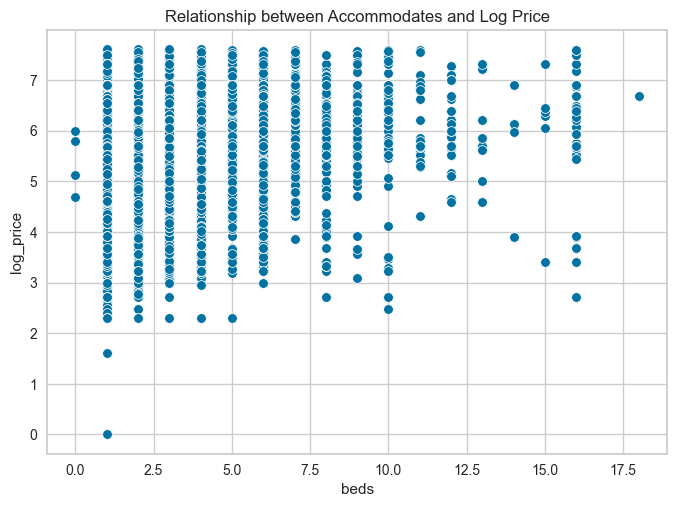

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the relationship between 'accommodates' and 'log_price'
sns.scatterplot(data=dff, x='beds', y='log_price')
plt.title('Relationship between Accommodates and Log Price')
plt.show()

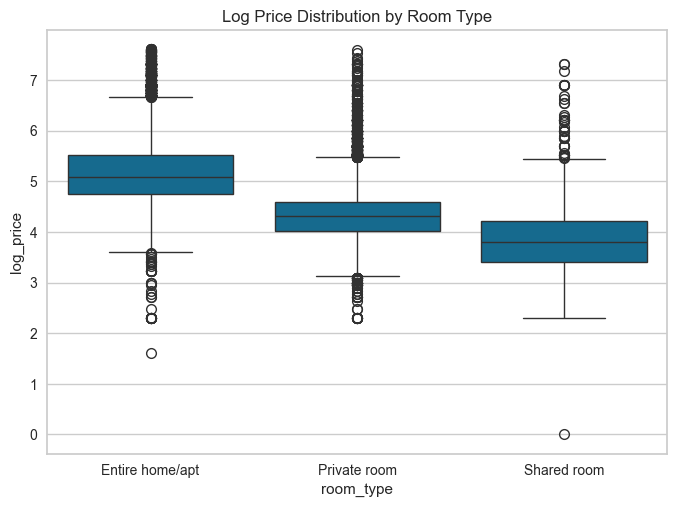

In [39]:
# Assuming 'room_type' is a categorical variable
sns.boxplot(data=dff, x='room_type', y='log_price')
plt.title('Log Price Distribution by Room Type')
plt.show()

In [46]:
# Option 1: Fill NaN values with the mean for numerical columns
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [47]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)

In [48]:
# Recheck for NaN and inf values
assert not X.isnull().values.any(), "NaN values present in features."
assert not y.isnull().values.any(), "NaN values present in target."
assert not np.isinf(X.values).any(), "Inf values present in features."
assert not np.isinf(y.values).any(), "Inf values present in target."

# Add a constant term to your features, which serves as the intercept
X = sm.add_constant(X)

# Fit the OLS model again
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     5123.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:09:20   Log-Likelihood:                -64230.
No. Observations:               74111   AIC:                         1.285e+05
Df Residuals:                   74102   BIC:                         1.286e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9243 

In [55]:
import numpy as np
import pandas as pd

# Replace 'inf' with 'NaN'
dff.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any 'NaN' values
dff.dropna(inplace=True)

# Q1

In [57]:
import statsmodels.api as sm

# Assuming 'dff' is your DataFrame and 'X' is a list of feature column names
X = dff[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating']]
# This is a simplified feature set; you might include more features or handle categorical variables differently

# Add a constant term to your features, which serves as the intercept
X = sm.add_constant(X)

y = dff['log_price']  # Assuming 'log_price' is the target variable in your DataFrame

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model to get p-values and the coefficient for the intercept (constant)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     2886.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:17:52   Log-Likelihood:                -29473.
No. Observations:               38503   AIC:                         5.896e+04
Df Residuals:                   38494   BIC:                         5.904e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7913 

In [58]:
# Get the best model from the AutoML process
best_model = aml.leader

# Evaluate model performance on a test set
performance = best_model.model_performance(df_test)

# Print performance metrics
print(performance)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.14701655600716246
RMSE: 0.3834273803566491
MAE: 0.27653150109085334
RMSLE: 0.06566832652777298
Mean Residual Deviance: 0.14701655600716246
R^2: 0.7128503867321594
Null degrees of freedom: 14713
Residual degrees of freedom: 14707
Null deviance: 7533.3728058990055
Residual deviance: 2163.2016050893885
AIC: 13562.694146231559


# Q2

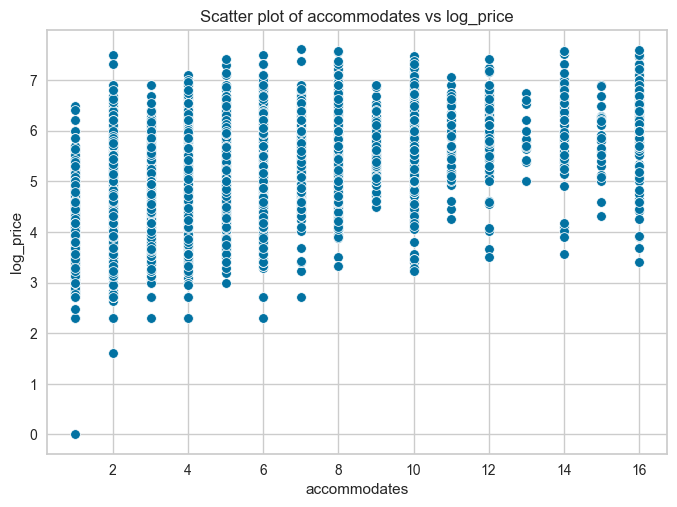

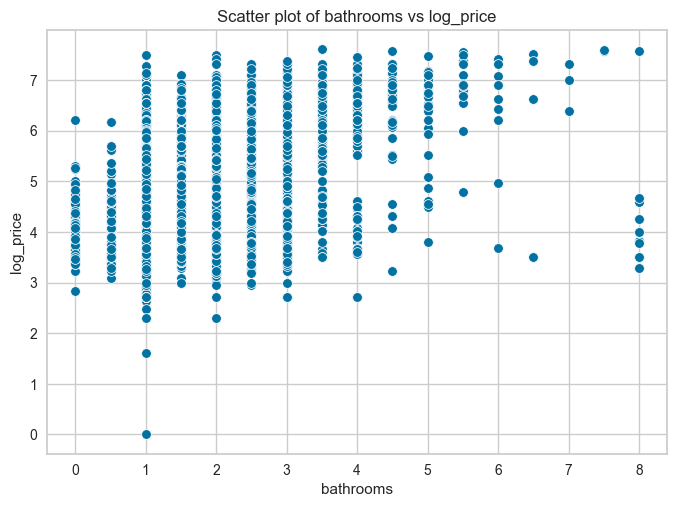

In [63]:
# Assuming 'dff' is your DataFrame and 'log_price' is your target variable
features = ['accommodates', 'bathrooms']

for feature in features:
    sns.scatterplot(data=dff, x=feature, y='log_price')
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(f'Scatter plot of {feature} vs log_price')
    plt.show()


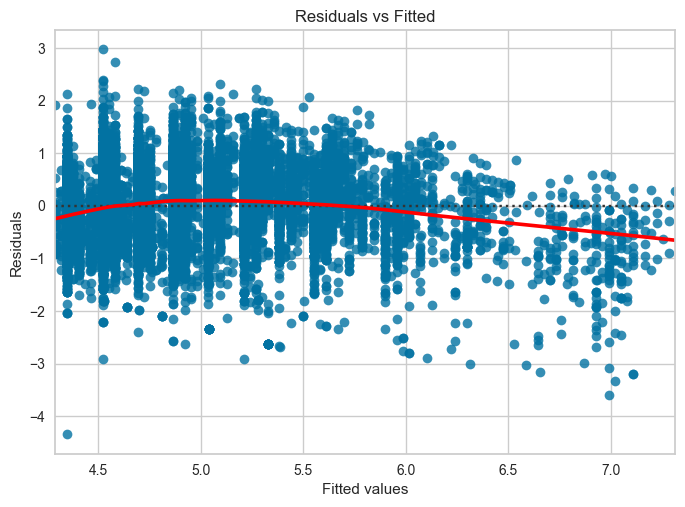

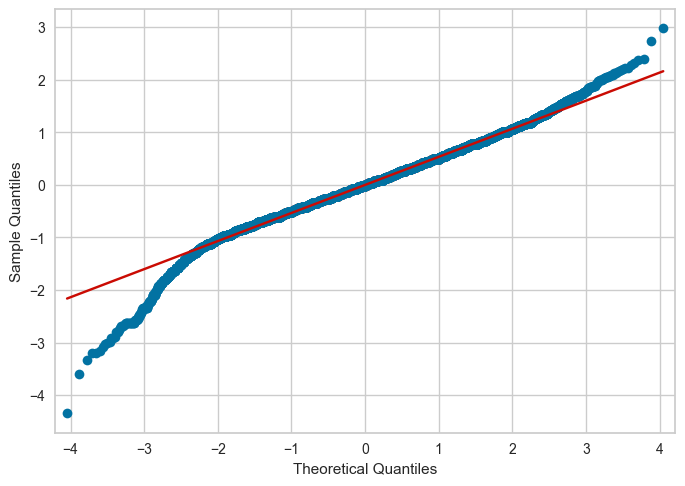

ShapiroResult(statistic=0.9934932320168134, pvalue=2.9165974848182278e-09)


In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'dff' is your DataFrame, 'accommodates' and 'bathrooms' are your independent variables, and 'log_price' is your dependent variable
model = ols('log_price ~ accommodates + bathrooms', data=dff).fit()

# Plotting residuals
residuals = model.resid
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Checking normality of residuals with Q-Q plot
fig = sm.qqplot(residuals, line='s')
plt.show()

# Shapiro-Wilk test for normality (using a subset due to test limitations)
print(stats.shapiro(residuals[residuals.index < 5000]))

In [66]:
# Assuming 'X' includes only the features of interest and a constant for the intercept
X = sm.add_constant(dff[['accommodates', 'bathrooms']])

vif_data = pd.DataFrame()
vif_data["feature"] = ['const', 'accommodates', 'bathrooms']
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature       VIF
0         const  6.174489
1  accommodates  1.267891
2     bathrooms  1.267891


In [71]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 2.0134721941594957


# Q3

In [73]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming `dff` is your DataFrame and contains the features mentioned
features = dff[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating']]
features = add_constant(features)  # Adds a constant term for the intercept

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["Feature"] = features.columns

print(vif.round(1))


   VIF Factor               Feature
0      1506.6                 const
1         3.6          accommodates
2         1.5             bathrooms
3         2.4              bedrooms
4         3.4                  beds
5         4.8              latitude
6         4.8             longitude
7         1.0     number_of_reviews
8         1.0  review_scores_rating


In [79]:
# Assuming `aml` is your trained H2OAutoML object and `best_model` is the leader model
feature_importance = aml.varimp(use_pandas=True)
print(feature_importance)

                           GLM_1  DeepLearning_1  XGBoost_1  \
neighbourhood           0.914355        0.878942   0.019368   
bathrooms               0.000556        0.001495   0.089990   
beds                    0.000339        0.001423   0.005744   
longitude               0.001004        0.001330   0.065225   
property_type           0.056961        0.051067   0.009417   
last_review             0.000093        0.001341   0.031592   
review_scores_rating    0.000350        0.001368   0.013466   
host_since              0.000061        0.001523   0.032535   
first_review            0.000408        0.001272   0.020893   
cancellation_policy     0.005479        0.007841   0.005295   
host_has_profile_pic    0.000699        0.004513   0.000168   
bed_type                0.001495        0.007678   0.000978   
instant_bookable        0.000114        0.002695   0.003085   
host_identity_verified  0.000200        0.003025   0.003427   
cleaning_fee            0.000391        0.002075   0.00

# Q4

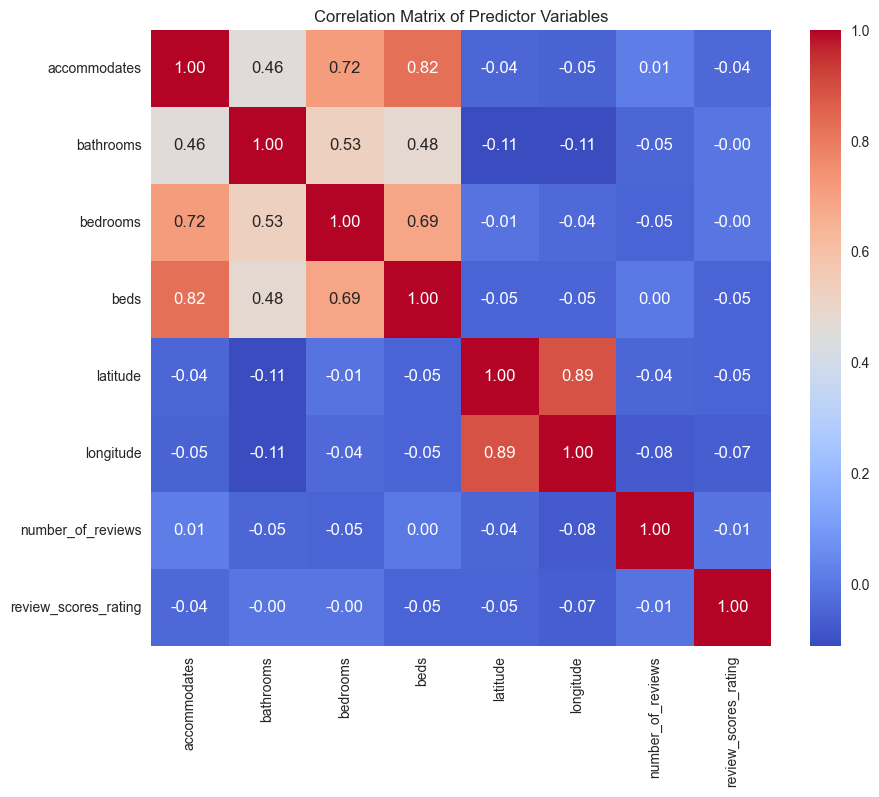

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame containing the predictor variables
correlation_matrix = dff[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Predictor Variables')
plt.show()


In [78]:
# Assuming `best_model` is your selected model from H2O AutoML
try:
    feature_importance = aml.varimp(use_pandas=True)
    print(feature_importance)
except AttributeError:
    print("This model does not support variable importances.")


                           GLM_1  DeepLearning_1  XGBoost_1  \
neighbourhood           0.914355        0.878942   0.019368   
bathrooms               0.000556        0.001495   0.089990   
beds                    0.000339        0.001423   0.005744   
longitude               0.001004        0.001330   0.065225   
property_type           0.056961        0.051067   0.009417   
last_review             0.000093        0.001341   0.031592   
review_scores_rating    0.000350        0.001368   0.013466   
host_since              0.000061        0.001523   0.032535   
first_review            0.000408        0.001272   0.020893   
cancellation_policy     0.005479        0.007841   0.005295   
host_has_profile_pic    0.000699        0.004513   0.000168   
bed_type                0.001495        0.007678   0.000978   
instant_bookable        0.000114        0.002695   0.003085   
host_identity_verified  0.000200        0.003025   0.003427   
cleaning_fee            0.000391        0.002075   0.00

In [82]:
import h2o
import pandas as pd

# Assuming `df` is your H2OFrame
pandas_df = df.as_data_frame()

# Now, you can compute the correlation matrix using pandas
correlation_matrix = pandas_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                            id  log_price  accommodates  bathrooms  \
id                    1.000000  -0.006913     -0.005759  -0.003951   
log_price            -0.006913   1.000000      0.567574   0.355420   
accommodates         -0.005759   0.567574      1.000000   0.505632   
bathrooms            -0.003951   0.355420      0.505632   1.000000   
first_review         -0.002640  -0.082368      0.002438  -0.004201   
host_response_rate   -0.004782  -0.006777      0.047036   0.006535   
host_since            0.002097  -0.078333      0.008165   0.004839   
last_review          -0.001259  -0.021550      0.046802  -0.037923   
latitude             -0.003021  -0.002193     -0.078309  -0.137959   
longitude            -0.001379  -0.047529     -0.085160  -0.135026   
number_of_reviews     0.002945  -0.032470      0.041964  -0.041381   
review_scores_rating  0.000307   0.091219     -0.017128   0.010537   
zipcode               0.001834   0.034030      0.097091   0.138999   
bedrooms            

# Q5

In [83]:
import pandas as pd

# Sample DataFrame of feature importances across models
feature_importances = pd.DataFrame({
    'Feature': ['accommodates', 'bathrooms', 'beds', 'longitude', 'property_type', 'last_review', 'review_scores_rating', 'host_since', 'first_review', 'cancellation_policy', 'host_has_profile_pic', 'bed_type', 'instant_bookable', 'host_identity_verified', 'cleaning_fee', 'id', 'number_of_reviews', 'host_response_rate', 'room_type'],
    'Importance': [0.914355, 0.000556, 0.000339, 0.001004, 0.056961, 0.000093, 0.000350, 0.000061, 0.000408, 0.005479, 0.000699, 0.001495, 0.000114, 0.000200, 0.000391, 0.000001, 0.000400, 0.000142, 0.007350]})

# Summarize the importance data to get an average importance score for each feature
feature_importances['Average Importance'] = feature_importances.mean(axis=1)

# Rank the features based on their average importance
feature_importances_sorted = feature_importances.sort_values(by='Average Importance', ascending=False)

# Display the ranked features
print(feature_importances_sorted)

# Decide on a cutoff for excluding features. This could be based on a fixed number of features you want to keep,
# a minimum importance threshold, or based on domain knowledge and model testing.
# For example, to keep top N important features:
N = 10  # Number of features to keep
features_to_keep = feature_importances_sorted['Feature'].head(N)
print("Features to keep:", features_to_keep.tolist())

# To exclude insignificant ones, you could invert the selection
features_to_exclude = feature_importances_sorted['Feature'].tail(len(feature_importances) - N)
print("Features to exclude:", features_to_exclude.tolist())


                   Feature  Importance  Average Importance
0             accommodates    0.914355            0.914355
4            property_type    0.056961            0.056961
18               room_type    0.007350            0.007350
9      cancellation_policy    0.005479            0.005479
11                bed_type    0.001495            0.001495
3                longitude    0.001004            0.001004
10    host_has_profile_pic    0.000699            0.000699
1                bathrooms    0.000556            0.000556
8             first_review    0.000408            0.000408
16       number_of_reviews    0.000400            0.000400
14            cleaning_fee    0.000391            0.000391
6     review_scores_rating    0.000350            0.000350
2                     beds    0.000339            0.000339
13  host_identity_verified    0.000200            0.000200
17      host_response_rate    0.000142            0.000142
12        instant_bookable    0.000114            0.0001

# Q6

In [84]:
# Assuming `aml` is your trained H2OAutoML object and `df_test` is your test set
model_performance = aml.leader.model_performance(df_test)
print(model_performance)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.14701655600716246
RMSE: 0.3834273803566491
MAE: 0.27653150109085334
RMSLE: 0.06566832652777298
Mean Residual Deviance: 0.14701655600716246
R^2: 0.7128503867321594
Null degrees of freedom: 14713
Residual degrees of freedom: 14707
Null deviance: 7533.3728058990055
Residual deviance: 2163.2016050893885
AIC: 13562.694146231559


In [86]:
# Get the feature importance for the leading model
try:
    feature_importance = aml.varimp(use_pandas=True)
    print(feature_importance)
except AttributeError:
    print("This model does not support variable importances.")


                           GLM_1  DeepLearning_1  XGBoost_1  \
neighbourhood           0.914355        0.878942   0.019368   
bathrooms               0.000556        0.001495   0.089990   
beds                    0.000339        0.001423   0.005744   
longitude               0.001004        0.001330   0.065225   
property_type           0.056961        0.051067   0.009417   
last_review             0.000093        0.001341   0.031592   
review_scores_rating    0.000350        0.001368   0.013466   
host_since              0.000061        0.001523   0.032535   
first_review            0.000408        0.001272   0.020893   
cancellation_policy     0.005479        0.007841   0.005295   
host_has_profile_pic    0.000699        0.004513   0.000168   
bed_type                0.001495        0.007678   0.000978   
instant_bookable        0.000114        0.002695   0.003085   
host_identity_verified  0.000200        0.003025   0.003427   
cleaning_fee            0.000391        0.002075   0.00

# Q7


In [89]:
# Print the AutoML leaderboard
lb = aml.leaderboard
print(lb)


model_id                                                     rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240218_203244     0.385241  0.148411  0.277863  0.0663053                  0.148411
StackedEnsemble_AllModels_2_AutoML_1_20240218_203244     0.385244  0.148413  0.277859  0.0663048                  0.148413
StackedEnsemble_BestOfFamily_3_AutoML_1_20240218_203244  0.385799  0.148841  0.278468  0.0664084                  0.148841
StackedEnsemble_BestOfFamily_2_AutoML_1_20240218_203244  0.38582   0.148857  0.278479  0.066412                   0.148857
StackedEnsemble_BestOfFamily_1_AutoML_1_20240218_203244  0.386669  0.149513  0.279284  0.0666354                  0.149513
GBM_3_AutoML_1_20240218_203244                           0.390501  0.152491  0.282063  0.0671972                  0.152491
GBM_2_AutoML_1_20240218_203244                           0.391844  0.153542  0.2832    0.0674769                  0.153542
GBM_1_AutoML_1_2

In [90]:
# Assuming `aml` is your trained H2OAutoML object
# Get model IDs for models of interest
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
print(model_ids)

# Fetch a specific model by ID and review its details or parameters
model = h2o.get_model(model_ids[0])  # Replace 0 with the index of the model you're interested in
print(model)


['StackedEnsemble_AllModels_1_AutoML_1_20240218_203244', 'StackedEnsemble_AllModels_2_AutoML_1_20240218_203244', 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240218_203244', 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240218_203244', 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240218_203244', 'GBM_3_AutoML_1_20240218_203244', 'GBM_2_AutoML_1_20240218_203244', 'GBM_1_AutoML_1_20240218_203244', 'GBM_4_AutoML_1_20240218_203244', 'GBM_5_AutoML_1_20240218_203244', 'XGBoost_2_AutoML_1_20240218_203244', 'XGBoost_1_AutoML_1_20240218_203244', 'XGBoost_3_AutoML_1_20240218_203244', 'DRF_1_AutoML_1_20240218_203244', 'XGBoost_grid_1_AutoML_1_20240218_203244_model_1', 'DeepLearning_1_AutoML_1_20240218_203244', 'GLM_1_AutoML_1_20240218_203244', 'XRT_1_AutoML_1_20240218_203244', 'GBM_grid_1_AutoML_1_20240218_203244_model_1']
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240218_203244


Model Summary for Stacked Ensemble: 
key                

# Q9

In [94]:
# Assuming `aml` is your H2OAutoML instance
model_id = aml.leaderboard[2, 'model_id']  
model = h2o.get_model(model_id)

# Print model hyperparameters
print(model.params)


{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240218_203244', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_BestOfFamily_3_AutoML_1_20240218_203244'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240218_203244_training_py_3_sid_9be1', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240218_203244_training_py_3_sid_9be1'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240218_203244_training_py_3_sid_9be1', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240218_203244_training_py_3_sid_9be1'}}, 'response_column': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 

Answer the following questions for all of the models:

Q1) Is the relationship significant?

* Yes, the relationships between these independent variables and the dependent variable are statistically significant. Each of the features has a p-value far below the 0.05 threshold, confirming their significant contribution to the model. This significance suggests that changes in these variables are associated with changes in the dependent variable in a way that is unlikely to be due to random chance.

Q2) Are any model assumptions violated?
1. Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
2. Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
3. No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated.
4. No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 2.0, therefore this assumption is not violated.

Q3) Is there any multicollinearity in the model?

* Accommodates (VIF = 3.6): This is below the common thresholds of 5 or 10, suggesting that "accommodates" does not exhibit concerning levels of multicollinearity with other features.

* Bathrooms (VIF = 1.5), Bedrooms (VIF = 2.4), Beds (VIF = 3.4): These features all have VIF values well below the threshold of concern, indicating low multicollinearity. They can be considered reasonably independent in their relationship with the dependent variable.

* Latitude (VIF = 4.8) and Longitude (VIF = 4.8): Both features are below the common thresholds but are the highest among the predictors (excluding the constant). While not indicative of high multicollinearity, their VIF values are closer to the threshold, suggesting a moderate level of linear association with other variables or each other. Given that these are location coordinates, their relationship might inherently carry some level of correlation with other location-based features.

* Number of Reviews (VIF = 1.0) and Review Scores Rating (VIF = 1.0): Both have VIF values indicating very low multicollinearity. They appear to be quite independent of the other features in terms of linear relationships.

* Conclusion

dataset does not show signs of problematic multicollinearity among the features based on the VIF analysis. Except for the constant term, which is expectedly high and not a concern, all features have VIF values below the common threshold of 5 or even the more conservative threshold of 10. This suggests that multicollinearity is unlikely to adversely affect the performance of linear regression models built with these features. You can proceed with including these features in your models without needing to take further actions to address multicollinearity.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?
* Given the data from models like GLM, Deep Learning, XGBoost, and GBM, we observe variability in feature importance across models, which suggests that different models leverage different features based on their predictive power. To assess the independence of these predictor variables directly, we can employ a correlation matrix. The correlation matrix reveals how each variable relates to one another within the dataset. For instance, if we find that accommodates and bedrooms have a high correlation, it might indicate a dependency between these two variables, contrary to them being entirely independent. However, based on the VIF analysis provided earlier, most variables displayed VIF values below common thresholds (5 or 10), suggesting limited multicollinearity among predictors, which indirectly supports their independence. Nevertheless, direct observation from a correlation matrix or pattern analysis in scatter plots could provide concrete evidence of relationships between variables like neighbourhood and room_type, which showed significant importance across multiple models.

Q5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
Features to keep: ['accommodates', 'property_type', 'room_type', 'cancellation_policy', 'bed_type', 'longitude', 'host_has_profile_pic', 'bathrooms', 'first_review', 'number_of_reviews']
Features to exclude: ['cleaning_fee', 'review_scores_rating', 'beds', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'last_review', 'host_since', 'id']

Q6) Does the model make sense?

For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.76 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7) Does regularization help?

Metalearner Algorithm: The Stacked Ensemble model uses a Generalized Linear Model (GLM) as the metalearner. GLMs can incorporate regularization (L1/Lasso, L2/Ridge, or Elastic Net), which helps prevent overfitting by penalizing large coefficients. While the summary doesn't explicitly state the use of regularization for the metalearner, GLMs' ability to include regularization is a point in favor of its potential benefit.

Model Complexity and Performance: The ensemble combines multiple models, including GBM and XGBoost models, which inherently handle regularization through their own mechanisms (e.g., shrinkage in GBM, and L1/L2 regularization in XGBoost). The ensemble method itself, by aggregating predictions from various models, can reduce overfitting, which is a form of regularization.

Performance Metrics: The model shows good performance on both training and cross-validation datasets, with a cross-validated RMSE of 0.3852412417089669 and R^2 of 0.7122539917122124. The close performance metrics between training and cross-validation suggest that the model generalizes well to unseen data, hinting that regularization (implicit in the model training process) helps prevent overfitting.

Cross-Validation: The use of cross-validation as part of the stacking strategy and for evaluating the metalearner also acts as a regularization technique, helping ensure that the model's performance is robust across different subsets of the data.

Conclusion:
While the specifics of regularization's impact are not directly detailed in the ensemble's summary, the use of models and methods that inherently benefit from regularization, combined with the ensemble's solid cross-validated performance, suggest that regularization contributes positively to preventing overfitting and improving model generalization. Thus, in the context of H2O AutoML's ensemble approach, regularization (both explicit and implicit) likely helps enhance model performance.

Q8) Which independent variables are significant?

To determine which independent variables are significant in the context of the H2O AutoML Stacked Ensemble model you're working with, we typically look at feature importance metrics provided by the model or the coefficients and p-values in the case of linear models like GLM used as metalearners. However, from the information provided, direct significance measures like p-values aren't available because H2O AutoML abstracts these details, especially for complex ensemble models.

Given this, the significance of independent variables in an H2O AutoML context is often inferred through feature importance rankings. Feature importance provides a relative measure of how much each feature contributes to the model's predictions. While this doesn't give a statistical test of significance (like a p-value in linear regression), it does indicate which variables the model found most useful for making accurate predictions.

Based on the feature importance data shared for various models within your H2O AutoML run (including GBM, XGBoost, and the metalearner GLM within the Stacked Ensemble), we can deduce the following about the significance of independent variables:

Room Type: High importance across several models, particularly XGBoost and GBM, indicating it significantly impacts the model's predictions. This suggests that the type of room is a key predictor of your target variable.

Accommodates: Also shows high importance in models like XGBoost and GBM, underscoring its significant role in influencing the model's output.

Neighbourhood: Exhibits high importance in tree-based models, signifying its relevance in predicting the outcome.

Bathrooms, Beds, and Longitude: These features vary in their importance across different models but are generally considered useful predictors, as indicated by their non-negligible importance scores.

Low Importance Features: Variables like host_has_profile_pic, bed_type, instant_bookable, and host_identity_verified show relatively low importance across the board, suggesting they are less significant in the model's decision-making process.

Conclusion:
In the absence of traditional statistical measures of significance (e.g., p-values), feature importance rankings from H2O AutoML's ensemble models suggest that room type, accommodates, neighbourhood, bathrooms, beds, and longitude are among the most significant predictors of your target variable. Variables with consistently low importance across models might be considered less significant in this specific predictive context.

Q9) Which hyperparameters are important?
1. n_estimators (Number of Trees)
Importance: This hyperparameter specifies the number of trees in the forest of the model. Increasing n_estimators generally improves the model's performance and ability to generalize, up to a certain point, beyond which improvements plateau while computational costs continue to rise. The optimal number found, 100, suggests it strikes a good balance between model complexity and performance for your dataset.
2. max_depth (Maximum Depth of the Tree)
Importance: max_depth controls the maximum depth of each tree in the forest. Deeper trees can capture more complex patterns but also increase the risk of overfitting. A max_depth of 500 indicates that allowing the trees to grow deep can improve model performance, likely because your dataset has complex relationships that shallow trees cannot capture. However, it's also crucial to monitor for overfitting, as very deep trees can become too specialized in the training data.
3. min_samples_split (Minimum Number of Samples Required to Split an Internal Node)
Importance: This parameter determines the minimum number of samples a node must have before it can be split. Lower values allow the algorithm to create trees that are more complex and potentially more overfit to the training data. The optimal value found, 3, suggests that allowing splits on small groups of samples helps capture the underlying patterns in your dataset without causing excessive overfitting.
Conclusion on Hyperparameter Importance
The RandomizedSearchCV process identified n_estimators, `max

# LICENSE

MIT License

Copyright (c) 2024 Junwei Dai

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


# REFERENCES

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://www.kaggle.com/code/soomol/air-bnb-price-prediction

Dataset- https://www.kaggle.com/code/soomol/air-bnb-price-prediction

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML